# DigData Facebook Data Science Challenge
*Rahat Ali - 06/2023*


Which advertising strategy is working better overall?

In the following sections, I will attempt to determine the best avertising strategy by comparing:
- Test vs Control
- Regulars and influencer ads
- Sound optimisation (i.e. best viewed muted or with sound)
- Format (video, image only)

In [26]:
# Imports
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [27]:
# Importing the excel data
df = pd.read_excel('Data Set.xlsx')

## Ads only or influencers?

In [44]:
# Select columns with Cell_id and question type.
df_ads_recall = df.loc[(df['Cell_id'] == 'Ads_only') & (df['Question Type'] == 'ad_recall')]
df_influencer_recall = df.loc[(df['Cell_id'] == 'Influencer') & (df['Question Type'] == 'ad_recall')]

df_ads_brand = df.loc[(df['Cell_id'] == 'Ads_only') & (df['Question Type'] == 'brand_awareness')]
df_influencer_brand = df.loc[(df['Cell_id'] == 'Influencer') & (df['Question Type'] == 'brand_awareness')]

df_ads_purchase_intent = df.loc[(df['Cell_id'] == 'Ads_only') & (df['Question Type'] == 'purchase_intent')]
df_influencer_purchase_intent = df.loc[(df['Cell_id'] == 'Influencer') & (df['Question Type'] == 'purchase_intent')]


In [63]:
# Finding the average test recall for each ad type
ads_recall_mean_test = df_ads_recall['Test Positive %'].mean()
influencer_recall_mean_test = df_influencer_recall['Test Positive %'].mean()

# Finding the average control recall for each ad type
ads_recall_mean_control = df_ads_recall['Control Positive %'].mean()
influencer_recall_mean_control = df_influencer_recall['Control Positive %'].mean()

# Average test brand awareness for each ad type
ads_brand_mean_test = df_ads_brand['Test Positive %'].mean()
influencer_brand_mean_test = df_influencer_brand['Test Positive %'].mean()

# Average control brand awareness for each ad type
ads_brand_mean_control = df_ads_brand['Control Positive %'].mean()
influencer_brand_mean_control = df_influencer_brand['Control Positive %'].mean()

# Average test purchase intent for each ad type
ads_purchase_intent_mean_test = df_ads_purchase_intent['Test Positive %'].mean()
influencer_purchase_intent_mean_test = df_influencer_purchase_intent['Test Positive %'].mean()

# Average control purchase intent for each ad type
ads_purchase_intent_mean_control = df_ads_purchase_intent['Control Positive %'].mean()
influencer_purchase_intent_mean_control = df_influencer_purchase_intent['Control Positive %'].mean()


# Printing the confidence interval for each ad type
print("Ads Test average positive %: ")
print("Recall: " + str(ads_recall_mean_test))
print("Brand Awareness: " + str(ads_brand_mean_test))
print("Purchase Intent: " + str(ads_purchase_intent_mean_test))
print("\n")
print("Ads Control average positive %: ")
print("Recall: " + str(ads_recall_mean_control))
print("Brand Awareness: " + str(ads_brand_mean_control))
print("Purchase Intent: " + str(ads_purchase_intent_mean_control))
print("\n")
print("Influencer Test average positive %: ")
print("Recall: " + str(influencer_recall_mean_test))
print("Brand Awareness: " + str(influencer_brand_mean_test))
print("Purchase Intent: " + str(influencer_purchase_intent_mean_test))
print("\n")
print("Influencer Control average positive %: ")
print("Recall: " + str(influencer_recall_mean_control))
print("Brand Awareness: " + str(influencer_brand_mean_control))
print("Purchase Intent: " + str(influencer_purchase_intent_mean_control))


Ads Test average positive %: 
Recall: 0.21170964805987486
Brand Awareness: 0.26585453106686013
Purchase Intent: 0.19085257964526842


Ads Control average positive %: 
Recall: 0.15282235064573108
Brand Awareness: 0.21816257835858205
Purchase Intent: 0.21114613877021424


Influencer Test average positive %: 
Recall: 0.22635132880183823
Brand Awareness: 0.24671611540833321
Purchase Intent: 0.20011711124373108


Influencer Control average positive %: 
Recall: 0.15873710920747294
Brand Awareness: 0.24671524915638265
Purchase Intent: 0.20877275863894748


### Comparing recall

<Axes: title={'center': 'Recall'}>

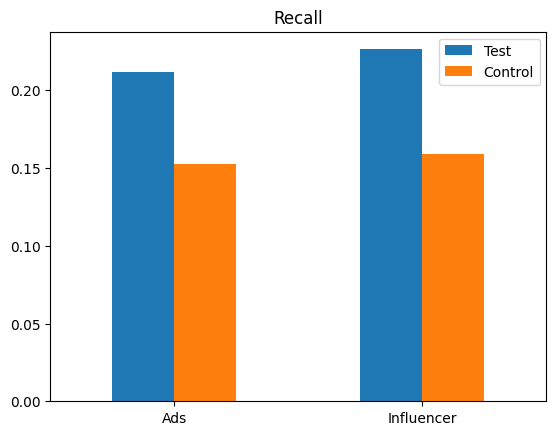

In [62]:
# sns.barplot(x='Cell_id', y='Test Positive %', data=df, hue='Question Type')
# sns.barplot(x='Cell_id', y='Control Positive %', data=df, hue='Question Type')

# Produce a graph to show disparity among ads and influencers for recall, brand awareness, and purchase intent
# Recall
recall_test = [ads_recall_mean_test, influencer_recall_mean_test]
recall_control = [ads_recall_mean_control, influencer_recall_mean_control]
recall_df = pd.DataFrame({'Test': recall_test, 'Control': recall_control}, index=['Ads', 'Influencer'])
recall_df.plot.bar(rot=0, title="Recall")

For both test and control audiences, ad recall was much higher when for normal ads compared to influencer ads. This means that people are more likely to remember ads when there are no influencers. Therefore, if the aim of the advertising campaign is to create a memorable ad, it should not include influencers.

### Comparing brand awareness

<Axes: title={'center': 'Brand Awareness'}>

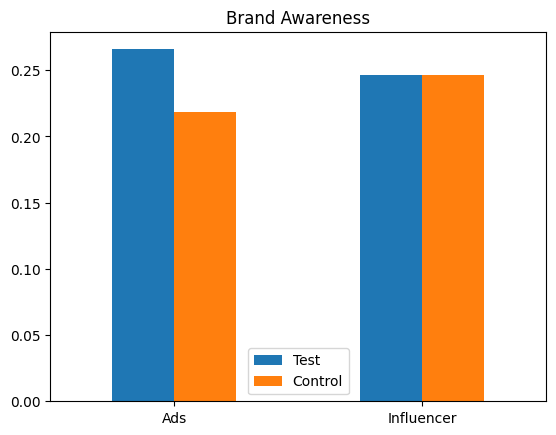

In [61]:
# Brand Awareness
brand_test = [ads_brand_mean_test, influencer_brand_mean_test]
brand_control = [ads_brand_mean_control, influencer_brand_mean_control]
brand_df = pd.DataFrame({'Test': brand_test, 'Control': brand_control}, index=['Ads', 'Influencer'])
brand_df.plot.bar(rot=0, title="Brand Awareness")

Brand awareness is a little higher among test audiences who saw the advertisements, but a little lower for control audiences. On the other hand, test and control audiences had the same number of desired responses for influencer advertisements. This means that advertisements containing influencers do not affect brand awareness for neither of the groups.

This means that if the goal is to improve brand awareness, normal advertisements are more likely to yield positive results.

### Comparing purchase intent

<Axes: title={'center': 'Purchase Intent'}>

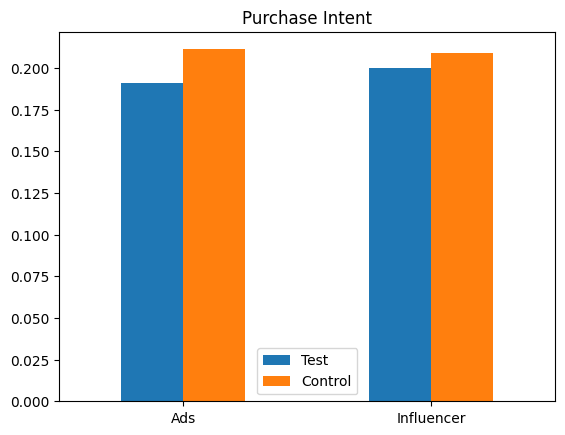

In [64]:
# Purchase Intent
purchase_intent_test = [ads_purchase_intent_mean_test, influencer_purchase_intent_mean_test]
purchase_intent_control = [ads_purchase_intent_mean_control, influencer_purchase_intent_mean_control]
purchase_intent_df = pd.DataFrame({'Test': purchase_intent_test, 'Control': purchase_intent_control}, index=['Ads', 'Influencer'])
purchase_intent_df.plot.bar(rot=0, title="Purchase Intent")

Control groups were more likely to purchase a product compared to test controls. This could mean that viewing an advertisement would make an audience less likely to purchase from that company. However, influencer advertisements overall produced slightly better results.

## Are the advertisements working as intended? (Test vs Control)
Before finding which avertisement strategy works best, we need to make sure that they are successful in the first place. This can be done by comparing test audiences and control audiences.

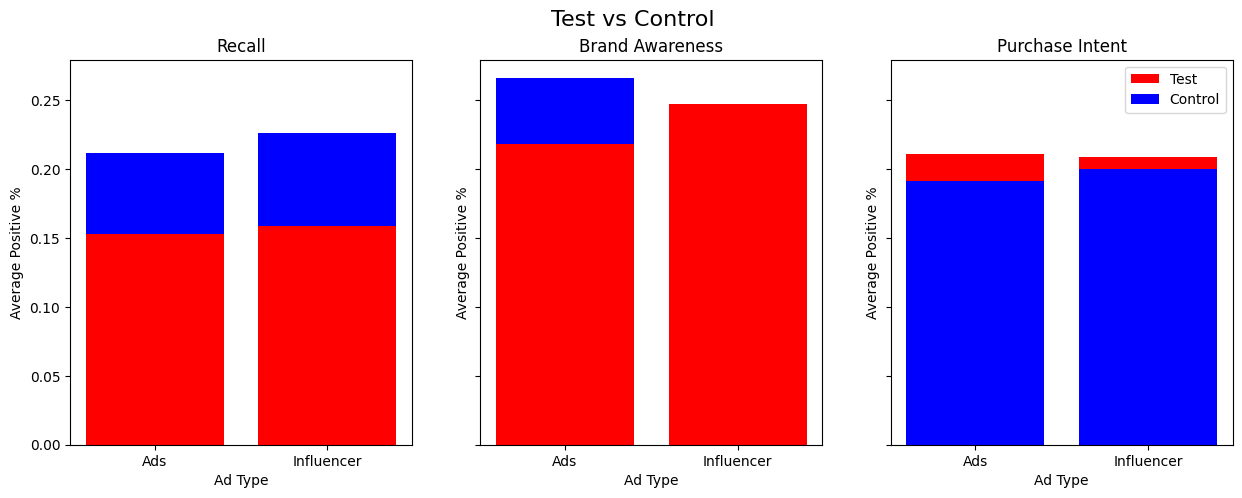

In [106]:
# Produce a graph to show disparity among ads and influencers test and control for recall, brand awareness, and purchase intent
# Recall
recall_test = [ads_recall_mean_test, influencer_recall_mean_test]
recall_control = [ads_recall_mean_control, influencer_recall_mean_control]
recall = [recall_test, recall_control]

# Brand Awareness
brand_test = [ads_brand_mean_test, influencer_brand_mean_test]
brand_control = [ads_brand_mean_control, influencer_brand_mean_control]
brand = [brand_test, brand_control]

# Purchase Intent
purchase_intent_test = [ads_purchase_intent_mean_test, influencer_purchase_intent_mean_test]
purchase_intent_control = [ads_purchase_intent_mean_control, influencer_purchase_intent_mean_control]
purchase_intent = [purchase_intent_test, purchase_intent_control]

# Creating the graph
fig, axs = plt.subplots(1, 3, figsize=(15, 5), sharey=True)
axs[0].bar(['Ads', 'Influencer'], recall_test, color='blue')
axs[0].bar(['Ads', 'Influencer'], recall_control, color='red')
axs[0].set_title('Recall')

axs[1].bar(['Ads', 'Influencer'], brand_test, color='blue')
axs[1].bar(['Ads', 'Influencer'], brand_control, color='red')
axs[1].set_title('Brand Awareness')

axs[2].bar(['Ads', 'Influencer'], purchase_intent_control, color='red')
axs[2].bar(['Ads', 'Influencer'], purchase_intent_test, color='blue')
axs[2].set_title('Purchase Intent')

fig.suptitle('Test vs Control', fontsize=16)
for ax in axs.flat: ax.set(xlabel='Ad Type', ylabel='Average Positive %')
plt.legend(['Test', 'Control'])

# Show the graph
plt.show()


We can see that on average, test audiences are more likely to give desired responses over control audiences meaning that both advertisements are succesful.

However, for brand awareness and purchase intent, both audiences share similar desired responses meaning that advertisements are not successful when it comes to changing audience's outlook on willingness to purchase and brand awareness when using celebrities.

## Creative considerations

The actual contents and structure of the advertisements can also affect the effect of advertisements on audiences. In the following section, we will compare:

- sound (on, off)
- brand showcase in the first 3 seconds (y/n)
- formats (image, video)
- platform (FB, IG)

### Sound

Are video advertisements that have sound more effective than videos with no sound?

Sound Off Test average positive %: 0.25972479424502687
Sound On Test average positive %: 0.1497277239565543
Sound Off Control average positive %: 0.25205587757864467
Sound On Control average positive %: 0.07796266601323919


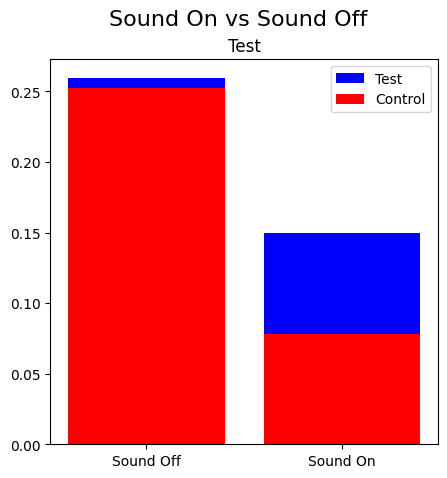

In [87]:
# Compare Sound
df_sound_off = df.loc[(df['Sound Off'] == 1) & (df['Format'] == 'Video')]
df_sound_on = df.loc[(df['Sound Off'] == 0) & (df['Format'] == 'Video')]

# Finding the average positive % for each sound type
test_sound_off_mean = df_sound_off['Test Positive %'].mean()
test_sound_on_mean = df_sound_on['Test Positive %'].mean()
control_sound_on_mean = df_sound_on['Control Positive %'].mean()
control_sound_off_mean = df_sound_off['Control Positive %'].mean()

# Printing the confidence interval for each sound type
print("Sound Off Test average positive %: " + str(test_sound_off_mean))
print("Sound On Test average positive %: " + str(test_sound_on_mean))
print("Sound Off Control average positive %: " + str(control_sound_off_mean))
print("Sound On Control average positive %: " + str(control_sound_on_mean))

# Produce a graph to show disparity among sound on and sound off for test and control
test_sound = [test_sound_off_mean, test_sound_on_mean]
control_sound = [control_sound_off_mean, control_sound_on_mean]
sound = [test_sound, control_sound]

# Creating the graph
fig, axs = plt.subplots(1, figsize=(5, 5), sharey=True)
axs.bar(['Sound Off', 'Sound On'], test_sound, color='blue')
axs.bar(['Sound Off', 'Sound On'], control_sound, color='red')
axs.set_title('Test')

fig.suptitle('Sound On vs Sound Off', fontsize=16)  
plt.legend(['Test', 'Control'])

# Show the graph
plt.show() 

There is a significant increase in positive responses among audiences who interacted with video advertisements with sound. Test audiences were slightly more in favour of muted videos, whereas they gave almost twice as many more positive responses for videos with audio.

### Brand Showcase

Are advertisements that showcase the brand in the first 3 seconds more effective?

Showcase Test average positive %: 0.2183866900492894
No Showcase Test average positive %: 0.2334264608375064
Showcase Control average positive %: 0.1983820780780743
No Showcase Control average positive %: 0.200777973473564


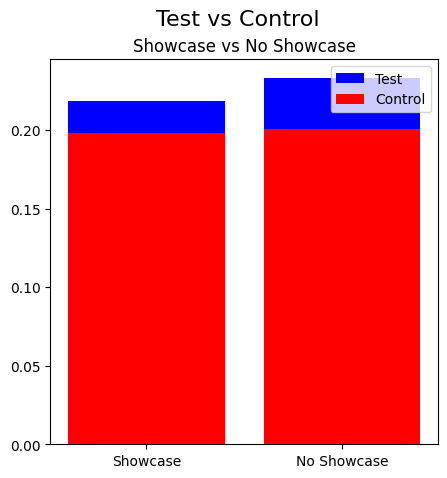

In [99]:
df_showcase = df.loc[(df['Brand within 3s'] == 1)]
df_no_showcase = df.loc[(df['Brand within 3s'] == 0)]

# Finding the average positive % for each showcase type
test_showcase_mean = df_showcase['Test Positive %'].mean()
test_no_showcase_mean = df_no_showcase['Test Positive %'].mean()
control_showcase_mean = df_showcase['Control Positive %'].mean()
control_no_showcase_mean = df_no_showcase['Control Positive %'].mean()


# Printing the confidence interval for each showcase type
print("Showcase Test average positive %: " + str(test_showcase_mean))
print("No Showcase Test average positive %: " + str(test_no_showcase_mean))
print("Showcase Control average positive %: " + str(control_showcase_mean))
print("No Showcase Control average positive %: " + str(control_no_showcase_mean))

# Produce a graph to show disparity among showcase on and off
test_showcase = [test_showcase_mean, test_no_showcase_mean]
control_showcase = [control_showcase_mean, control_no_showcase_mean]
showcase = [test_showcase, control_showcase]

# Creating the graph
fig, axs = plt.subplots(1, figsize=(5, 5), sharey=True)
axs.bar(['Showcase', 'No Showcase'], test_showcase, color='blue')
axs.bar(['Showcase', 'No Showcase'], control_showcase, color='red')
axs.set_title('Showcase vs No Showcase')
fig.suptitle('Test vs Control', fontsize=16)
plt.legend(['Test', 'Control'])

# Show the graph
plt.show()

For control audiences, both showcase and no showcase advertisements performed similarly. However, for test audiences, both had more positive responsive though no showcase had a little higher number of responses. This means that when dealing with test audiences, not showcasing is better.

### Formats

Which media format is best for an advertisement?

Video Test average positive %: 0.23972532691984996
Image Test average positive %: 0.2283570992612742
Mix Test average positive %: 0.1624084333838434
Video Control average positive %: 0.22040256638493452
Image Control average positive %: 0.20264530323118826
Mix Control average positive %: 0.12889418568703379


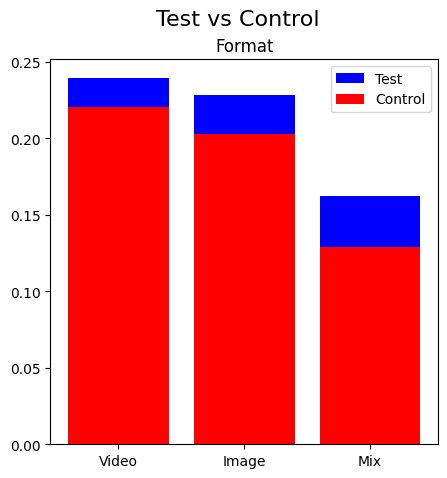

In [100]:
df_video = df.loc[(df['Format'] == 'Video')]
df_image = df.loc[(df['Format'] == 'Image')]
df_mix = df.loc[(df['Format'] == 'Mix')]

# Finding the average positive % for each format type
test_video_mean = df_video['Test Positive %'].mean()
test_image_mean = df_image['Test Positive %'].mean()
test_mix_mean = df_mix['Test Positive %'].mean()
control_video_mean = df_video['Control Positive %'].mean()
control_image_mean = df_image['Control Positive %'].mean()
control_mix_mean = df_mix['Control Positive %'].mean()

# Printing the confidence interval for each format type
print("Video Test average positive %: " + str(test_video_mean))
print("Image Test average positive %: " + str(test_image_mean))
print("Mix Test average positive %: " + str(test_mix_mean))
print("Video Control average positive %: " + str(control_video_mean))
print("Image Control average positive %: " + str(control_image_mean))
print("Mix Control average positive %: " + str(control_mix_mean))

# Produce a graph to show disparity among format types
test_format = [test_video_mean, test_image_mean, test_mix_mean]
control_format = [control_video_mean, control_image_mean, control_mix_mean]
format = [test_format, control_format]

# Creating the graph
fig, axs = plt.subplots(1, figsize=(5, 5), sharey=True)
axs.bar(['Video', 'Image', 'Mix'], test_format, color='blue')
axs.bar(['Video', 'Image', 'Mix'], control_format, color='red')
axs.set_title('Format')
fig.suptitle('Test vs Control', fontsize=16)
plt.legend(['Test', 'Control'])
plt.show()

Mixed format advertisement performed significantly worse compared to other advertisement formats. Overall, video advertisements produced the most positive responses. Test audiences had a slighly higher number of positive responses compared to control audiences.

### Platform

Which platform gave the highest number of positive responses?

IG Test average positive %: 0.16096937057145735
FB Test average positive %: 0.2640022231525191
FB+IG Test average positive %: 0.22198539502428571
IG Control average positive %: 0.1296249300213941
FB Control average positive %: 0.3288478941121153
FB+IG Control average positive %: 0.1827129470316435


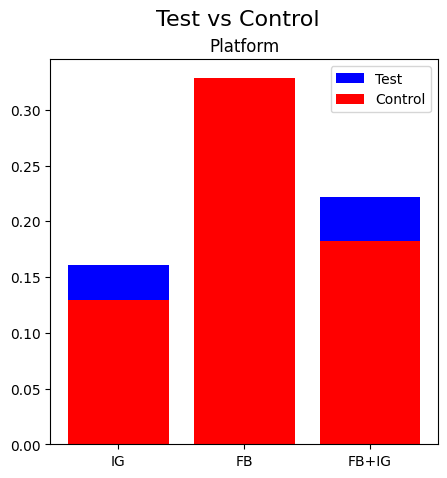

In [107]:
df_ig = df.loc[(df['Platform'] == 'IG')]
df_fb = df.loc[(df['Platform'] == 'FB')]
df_fbig = df.loc[(df['Platform'] == 'FB+IG')]

# Finding the average positive % for each platform
test_ig_mean = df_ig['Test Positive %'].mean()
test_fb_mean = df_fb['Test Positive %'].mean()
test_fbig_mean = df_fbig['Test Positive %'].mean()
control_ig_mean = df_ig['Control Positive %'].mean()
control_fb_mean = df_fb['Control Positive %'].mean()
control_fbig_mean = df_fbig['Control Positive %'].mean()

# Printing the confidence interval for each platform
print("IG Test average positive %: " + str(test_ig_mean))
print("FB Test average positive %: " + str(test_fb_mean))
print("FB+IG Test average positive %: " + str(test_fbig_mean))

print("IG Control average positive %: " + str(control_ig_mean))
print("FB Control average positive %: " + str(control_fb_mean))
print("FB+IG Control average positive %: " + str(control_fbig_mean))

# Produce a graph to show disparity among platforms
test_platform = [test_ig_mean, test_fb_mean, test_fbig_mean]
control_platform = [control_ig_mean, control_fb_mean, control_fbig_mean]
platform = [test_platform, control_platform]

# Creating the graph
fig, axs = plt.subplots(1, figsize=(5, 5), sharey=True)
axs.bar(['IG', 'FB', 'FB+IG'], test_platform, color='blue')
axs.bar(['IG', 'FB', 'FB+IG'], control_platform, color='red')
axs.set_title('Platform')
fig.suptitle('Test vs Control', fontsize=16)
plt.legend(['Test', 'Control'])
plt.show()

The best platform to advertise on was, by far, facebook. Control audiences had better results than test audiences.

## Conclusion

To recap, the advertisements were successful for ad recall and brand awareness when using ads. However, they did not help improve brand awareness when using influencers nor did it increase purchase intent.

Advertisments which did not include influencers were more likely to be remembered by audiences. For brand awareness, influencers did help but ads were shown to be more effective. Test audiences were less likely to purchase a product compared to the control group, though influencer advertisements had slightly higher positive percentages.

Generally, ads with no audio performed much better than ads with sound. Not showcasing to test audiences would yield  the most number of positive responses.  The best format was video, meaning that to have the highest number of positive responses an advertisement would need to be a video, with no audio and not showcasing in the first three seconds. Additionally, the best platform to advertise on was Facebook.

Advertisements may be more successful than influencers as the audience would associate with the individual, rather than the brand.

For their next post, Jaspers Designer Boutique should advertise on facebook. The advertisement should be a video with no audio and no showcase in the first three seconds.

If I were given more time and data, I would look at the click through rate, and return on ad spend which would suggest that the advertisement is of people's interest and would therefore benefit from higher purchases.